<a href="https://colab.research.google.com/github/hmcarrasco/fcc_health_costs_calculator/blob/main/Health_Costs_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-07-06 23:28:41--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.4’

insurance.csv.4     100%[===================>]  49.09K  --.-KB/s    in 0.007s  

2024-07-06 23:28:41 (7.33 MB/s) - ‘insurance.csv.4’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
print(dataset['sex'].unique())
print(dataset['smoker'].unique())
print(dataset['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
dataset['sex'].replace({'male': 0, 'female': 1}, inplace=True)
dataset['smoker'].replace({'no': 0, 'yes': 1}, inplace=True)
dataset['region'].replace({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}, inplace=True)
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,0,31.0,3,0,1,10600.55
1334,18,1,31.9,0,0,0,2205.98
1335,18,1,36.9,0,0,2,1629.83
1336,21,1,25.8,0,0,3,2007.95
1337,61,1,29.1,0,1,1,29141.36


In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [ ]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

In [ ]:
model = keras.Sequential([
  normalizer,
  layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
  layers.Dropout(0.2),
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])


model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='mae', metrics=['mae','mse'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense_28 (Dense)            (None, 64)                448       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                      

In [ ]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=200,
    verbose=1
)


Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13054.1709 - mae: 13054.1709 - mse: 314133312.0000
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13046.2734 - mae: 13046.2734 - mse: 313910752.0000
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13030.9404 - mae: 13030.9404 - mse: 313491520.0000
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13003.6699 - mae: 13003.6699 - mse: 312740128.0000
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 12959.7158 - mae: 12959.7158 - mse: 311563904.0000
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 12897.4258 - mae: 12897.4258 - mse: 309892000.0000
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12806.2422 - mae: 12806.2422 - mse: 307511872.0000
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12685.5898 - mae: 12685.5898 - mse: 304328448.0000
Epoch 9/

9/9 - 0s - loss: 2980.1367 - mae: 2980.1367 - mse: 35997264.0000 - 194ms/epoch - 22ms/step
Testing set Mean Abs Error: 2980.14 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


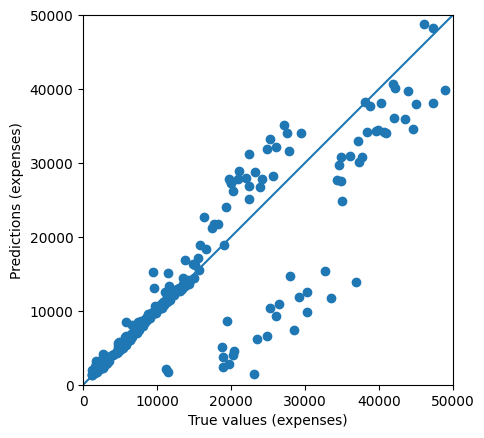

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
